### Data description:

Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing, and digital marketing.

Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).

__A part of data is split randomly as test data__

### Data dictionary:

> 1 - age (numeric)

> 2 - job : type of job (categorical: "admin","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")

> 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

> 4 - education (categorical: "unknown","secondary","primary","tertiary")

> 5 - default: has credit in default? (binary: "yes","no")

> 6 - balance: average yearly balance, in euros (numeric)

> 7 - housing: has housing loan? (binary: "yes","no")

> 8 - loan: has personal loan? (binary: "yes","no")

##### related with the last contact of the current campaign:
> 9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

> 10 - day: last contact day of the month (numeric)

> 11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

> 12 - duration: last contact duration, in seconds (numeric)

##### other attributes:
> 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

> 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

> 15 - previous: number of contacts performed before this campaign and for this client (numeric)

> 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

##### Output variable (desired target):
> 17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Reading the data and making initial cleaning

In [2]:
banking_df = pd.read_csv('banking dataset.csv', sep = ';')

In [3]:
banking_df.shape

(45211, 17)

In [4]:
banking_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
banking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


There are no null values present in the dataset. The null values are represented as unknown as per the data dictionary in `job`, `education`, `contact`, `poutcome` features

Let's inspect the number of unknown values in each of the above mentioned features

In [6]:
unknown_list = ['job','education','contact','poutcome']

for i in unknown_list:
    
    print(f'{(banking_df[i]== "unknown").value_counts()}\n\n')

False    44923
True       288
Name: job, dtype: int64


False    43354
True      1857
Name: education, dtype: int64


False    32191
True     13020
Name: contact, dtype: int64


True     36959
False     8252
Name: poutcome, dtype: int64




All the features with null values are categorical features. Let's see if they need special attention in later stage of the process.

#### Visualizing and organizing the data for better understanding of the dataframe

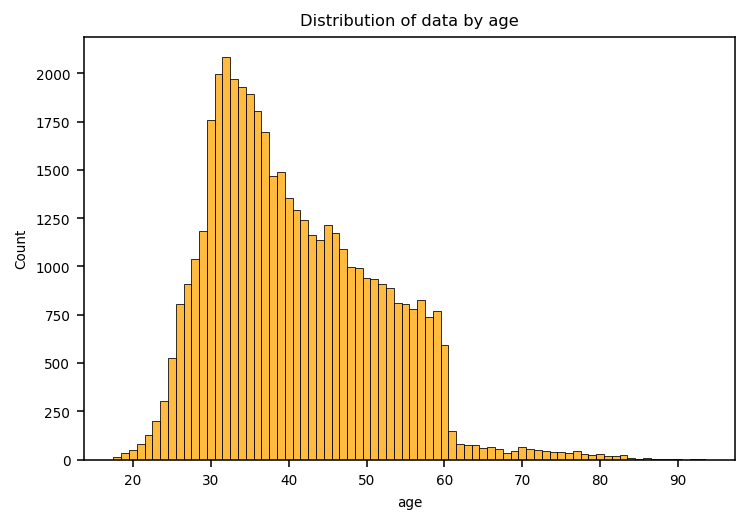

In [7]:
plt.rcParams['figure.dpi'] = 140
plt.rcParams['font.size'] = 7

bins = (np.arange(banking_df.age.min(), banking_df.age.max()) - 0.5)
sns.histplot(banking_df.age, bins = bins, color='orange')
plt.title('Distribution of data by age')

plt.show()

From the above histogram, we can infer that, the clients with ages from 25 to 60 are the most likely target. Also, the distribution is positively skewed.

Now, lets do a box plot for the age distribution

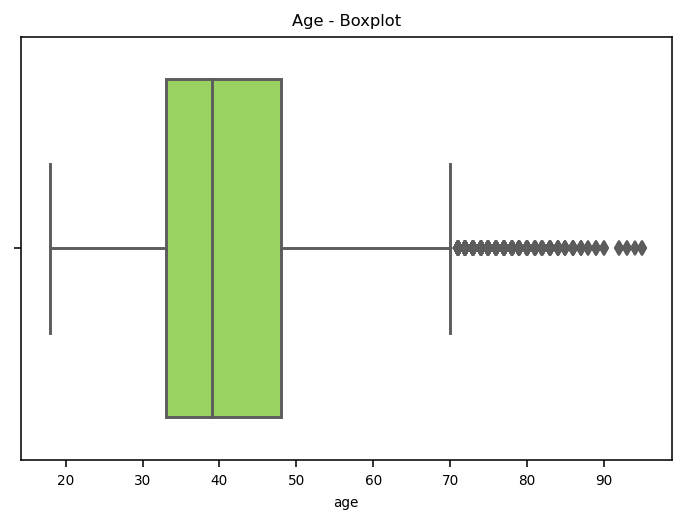

In [8]:
sns.boxplot(x = 'age', data = banking_df, color=[0.6,0.9,0.3])
plt.title('Age - Boxplot')

plt.show()

The inter-quatrile range lies between 33 years and 49 years

In [9]:
banking_df.job.value_counts(normalize=True)

blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64

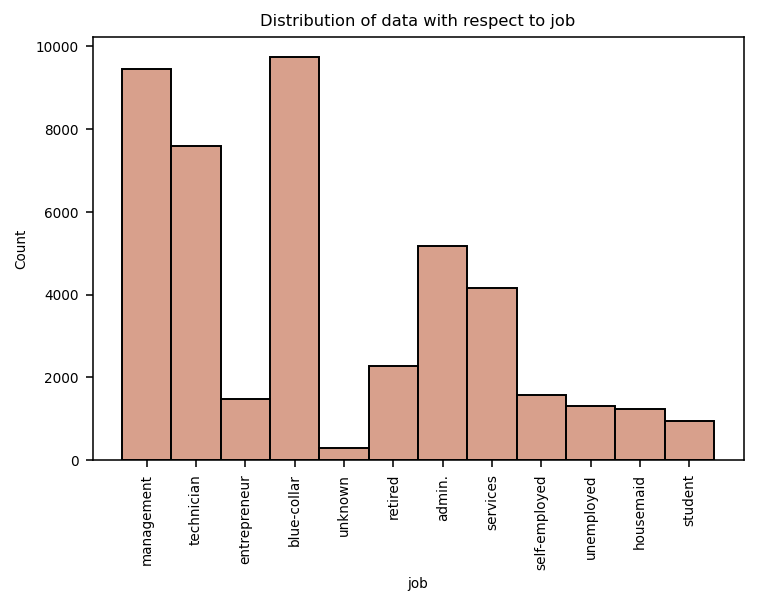

In [10]:
sns.histplot(banking_df.job, color= [0.8,0.5,0.4])
locs, labels = plt.xticks()
plt.setp(labels, rotation = 90)

plt.title('Distribution of data with respect to job')

plt.show()

It can be seen that the blue-collar and management are the most targeted, followed by technicians.

In [11]:
banking_df.education.value_counts(normalize=True)

secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64

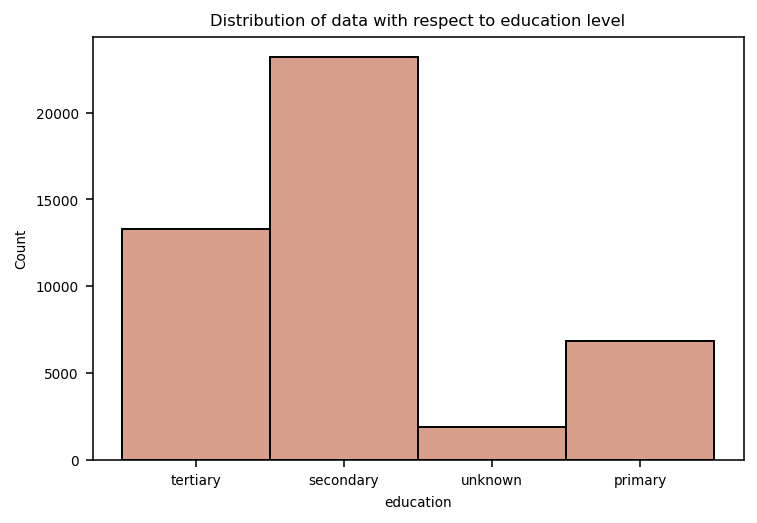

In [12]:
sns.histplot(banking_df.education, color = [0.8,0.5,0.4])

plt.title('Distribution of data with respect to education level')
plt.show()


Clients with atleast secondary educational qualification are the most targetted

In [13]:
banking_df.marital.value_counts(normalize=True)

married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64

In [14]:
banking_df.default.value_counts(normalize=True)

no     0.981973
yes    0.018027
Name: default, dtype: float64

In [15]:
banking_df.housing.value_counts(normalize=True)

yes    0.555838
no     0.444162
Name: housing, dtype: float64

In [16]:
banking_df.loan.value_counts(normalize=True)

no     0.839774
yes    0.160226
Name: loan, dtype: float64

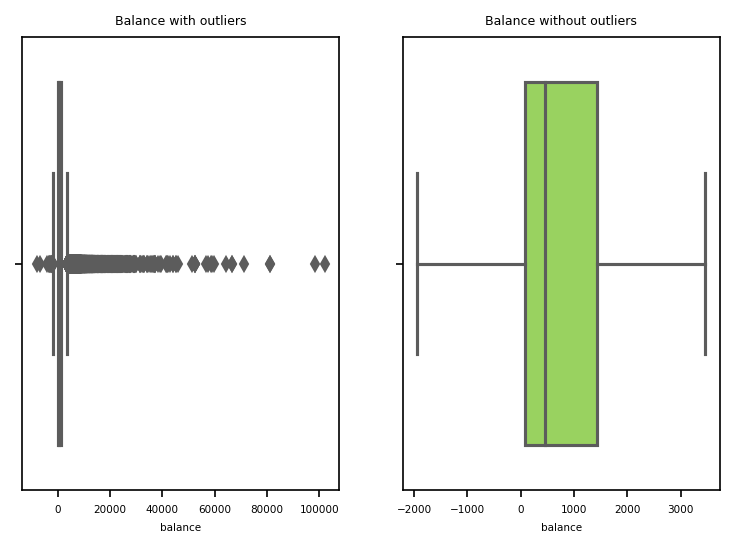

In [17]:
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.size'] = 5

plt.subplot(1,2,1)
sns.boxplot(x = 'balance', data = banking_df, color=[0.6,0.9,0.3])
plt.title('Balance with outliers')

plt.subplot(1,2,2)
sns.boxplot(x = 'balance', data = banking_df, showfliers=False, color=[0.6,0.9,0.3])
plt.title('Balance without outliers')

plt.show()

It can be seen that, the inter-quartile range of the yearly average balance lies between 0 and 1800 Euros. Though there are many outliers, ranging from a negative balance to 100,000 Euros

In [18]:
banking_df.contact.value_counts(normalize=True)

cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: contact, dtype: float64

In [19]:
banking_df.day.value_counts(normalize=True).sort_values(ascending=False)

20    0.060870
18    0.051050
21    0.044812
17    0.042888
6     0.042733
5     0.042246
14    0.040875
8     0.040742
28    0.040477
7     0.040189
19    0.038862
29    0.038597
15    0.037668
12    0.035456
13    0.035058
30    0.034638
9     0.034527
11    0.032713
4     0.031961
16    0.031298
2     0.028599
27    0.024795
3     0.023866
26    0.022893
23    0.020769
22    0.020017
25    0.018580
31    0.014222
10    0.011590
24    0.009887
1     0.007122
Name: day, dtype: float64

In [20]:
banking_df.month.value_counts(normalize=True).sort_values(ascending=False)

may    0.304483
jul    0.152507
aug    0.138174
jun    0.118135
nov    0.087810
apr    0.064851
feb    0.058592
jan    0.031032
oct    0.016323
sep    0.012807
mar    0.010551
dec    0.004733
Name: month, dtype: float64

Most number of calls are done in the month of `May` and the least in `December`. It's obvious as December is the holiday season

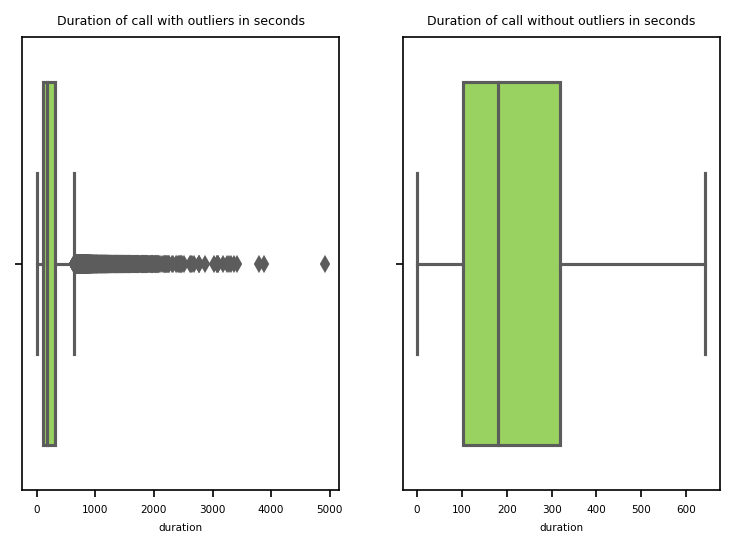

In [21]:
plt.subplot(1,2,1)
sns.boxplot(x = 'duration', data = banking_df, color=[0.6,0.9,0.3])
plt.title('Duration of call with outliers in seconds')

plt.subplot(1,2,2)
sns.boxplot(x = 'duration', data = banking_df, showfliers=False, color=[0.6,0.9,0.3])
plt.title('Duration of call without outliers in seconds')

plt.show()

The interquartile range lies between 2minutes and 5minutes approximately. 

The longest duration of call is about 85 minutes.

In [22]:
banking_df.pdays.value_counts(normalize=True).sort_values(ascending=False)

-1      0.817367
 182    0.003694
 92     0.003251
 91     0.002787
 183    0.002787
          ...   
 520    0.000022
 424    0.000022
 871    0.000022
 775    0.000022
 831    0.000022
Name: pdays, Length: 559, dtype: float64

81.7% of the customers were contacted for the first time, as -1 is mentioned as 'contacted for the first time' in the data dictionary

In [23]:
banking_df.previous.value_counts(normalize=True).sort_values(ascending=False)

0      0.817367
1      0.061313
2      0.046582
3      0.025259
4      0.015793
5      0.010152
6      0.006127
7      0.004534
8      0.002853
9      0.002035
10     0.001482
11     0.001438
12     0.000973
13     0.000841
15     0.000442
14     0.000420
17     0.000332
16     0.000288
19     0.000243
23     0.000177
20     0.000177
22     0.000133
18     0.000133
27     0.000111
24     0.000111
21     0.000088
29     0.000088
25     0.000088
30     0.000066
28     0.000044
38     0.000044
37     0.000044
26     0.000044
40     0.000022
275    0.000022
51     0.000022
55     0.000022
35     0.000022
32     0.000022
58     0.000022
41     0.000022
Name: previous, dtype: float64

This further confirms, 81.7% of the customers were contacted for the first time.

In [24]:
banking_df.poutcome.value_counts(normalize=True)

unknown    0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: poutcome, dtype: float64

81.7% of the result from previous marketing campaign remain unknown. 

#### Let's prep the data to fit into a classifier model

In [25]:
test_df = pd.read_csv('test.csv',sep = ';')

test_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [26]:
X_train = banking_df.iloc[:,:-1]

X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


In [27]:
X_test = test_df.iloc[:,:-1]

X_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown


In [28]:
y_train = banking_df[['y']]

y_train.head()

,y
0,no
1,no
2,no
3,no
4,no


In [29]:
y_test = test_df[['y']]

y_test.head()

,y
0,no
1,no
2,no
3,no
4,no


In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


#### Let's encode the data with One hot encoding and label encoding to fit the data in model

In [31]:
ohe_list = ['job','marital','default','housing','loan','contact','month','poutcome']

In [32]:
X_train = pd.get_dummies(X_train, prefix=ohe_list, columns=ohe_list, drop_first=True)

In [33]:
X_test = pd.get_dummies(X_test, prefix=ohe_list, columns=ohe_list, drop_first=True )

In [34]:
edu_cat = {'unknown':0, 'primary':1, 'secondary':2, 'tertiary':3}

In [35]:
X_train.education = X_train.education.replace(edu_cat)

X_train.head()

,age,education,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,3,2143,5,261,1,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,2,29,5,151,1,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,2,5,76,1,-1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,47,0,1506,5,92,1,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,0,1,5,198,1,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [36]:
X_test.education = X_test.education.replace(edu_cat)

X_test.head()

,age,education,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,1,1787,19,79,1,-1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,33,2,4789,11,220,1,339,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,35,3,1350,16,185,1,330,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,3,1476,3,199,4,-1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,59,2,0,5,226,1,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [37]:
y_cat = {'no':0, 'yes':1}

In [38]:
y_train.y = y_train.y.replace(y_cat)

y_train.head()

C:\Users\ABISHEK\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,y
0,0
1,0
2,0
3,0
4,0


In [39]:
y_test.y = y_test.y.replace(y_cat)

y_test.head()

C:\Users\ABISHEK\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,y
0,0
1,0
2,0
3,0
4,0


#### Using machine learning models to fit the train data and evaluate with the test data

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, make_scorer, confusion_matrix, classification_report, fbeta_score

## Using K-NN classifier

In [41]:
knn = KNeighborsClassifier(n_neighbors=10)

In [42]:
knn.fit(X_train,y_train)

C:\Users\ABISHEK\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [43]:
knn_pred = knn.predict(X_test)

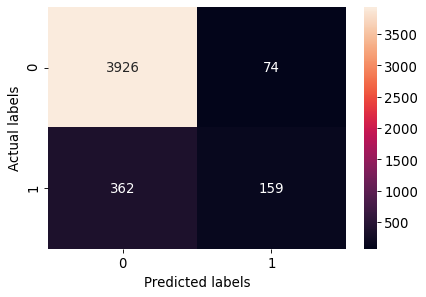

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4000
           1       0.68      0.31      0.42       521

    accuracy                           0.90      4521
   macro avg       0.80      0.64      0.68      4521
weighted avg       0.89      0.90      0.89      4521



In [44]:
plt.rcParams['figure.dpi'] = 80
plt.rcParams['font.size'] = 12

sns.heatmap(confusion_matrix(y_test, knn_pred), annot = True, fmt = 'd')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')

plt.show()
print(classification_report(y_test, knn_pred))

Let's use decision tree to check if we can get the result with more precision

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dt = DecisionTreeClassifier()

In [47]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [48]:
dt_pred = dt.predict(X_test)

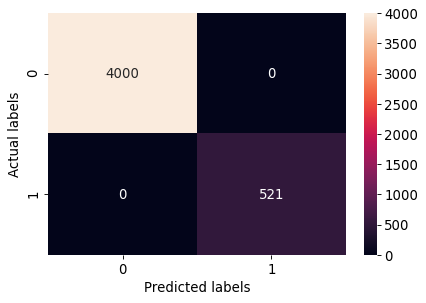

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       1.00      1.00      1.00       521

    accuracy                           1.00      4521
   macro avg       1.00      1.00      1.00      4521
weighted avg       1.00      1.00      1.00      4521



In [49]:
sns.heatmap(confusion_matrix(y_test, dt_pred), annot = True, fmt = 'd')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')

plt.show()
print(classification_report(y_test, dt_pred))

#### With the decision tree model, we have achieved a 100% accurate model for the given dataset 